In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
from sklearn.preprocessing import MinMaxScaler
from keras.layers import LSTM,Dense,Dropout
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.dates as mdates
from sklearn import linear_model
import tushare as ts

Using TensorFlow backend.


In [2]:
Tempt =  pd.read_excel('imbalance&return20.xlsx', sheet_name = 'huobidm')

In [3]:
Tempt.head()

,asks20,bids20,average imbalance,order imbalance ratio,net trade size,depth imbalance,return20,signal20
0,-6.832207,-715.576838,-1243.4,-0.440464,-3360,-3931,-0.000107,1
1,-50.238615,-179.978286,-1138.4,-0.487812,0,260,-0.000107,1
2,-41.439842,-171.798518,-543.4,-0.805547,0,228,-0.000107,1
3,-4.850144,-184.315368,-581.2,-0.894330,-82,-1389,-0.000107,1
4,-6.506291,-190.560469,-528.4,-0.885065,2,-1543,-0.000107,1


In [4]:
look_back = 20
for i in range(20, 20+look_back+1, 1):
    Tempt['return20 - ' + str(i) + 'd'] = Tempt['return20'].shift(i)
Tempt.head(look_back+1)

,asks20,bids20,average imbalance,order imbalance ratio,net trade size,depth imbalance,return20,signal20,return20 - 20d,return20 - 21d,...,return20 - 31d,return20 - 32d,return20 - 33d,return20 - 34d,return20 - 35d,return20 - 36d,return20 - 37d,return20 - 38d,return20 - 39d,return20 - 40d
0,-6.832207,-715.576838,-1243.4,-0.440464,-3360,-3931,-1.068673e-04,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-50.238615,-179.978286,-1138.4,-0.487812,0,260,-1.068673e-04,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-41.439842,-171.798518,-543.4,-0.805547,0,228,-1.068673e-04,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-4.850144,-184.315368,-581.2,-0.894330,-82,-1389,-1.068673e-04,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-6.506291,-190.560469,-528.4,-0.885065,2,-1543,-1.068673e-04,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,-8.477894,-198.728029,-325.4,-0.974018,-92,-1580,-1.068673e-04,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,-1.735011,-253.790818,-629.2,0.433692,-300,-3235,-6.072648e-07,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,-10.024297,-38.844103,-1117.2,-0.842775,0,-3580,0.000000e+00,2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,-10.224783,-145.188727,-1052.8,-0.834416,0,-4068,0.000000e+00,2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,-11.527941,-133.632434,-1087.8,-0.813077,0,-2989,0.000000e+00,2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
test = Tempt.dropna()
test.head()

,asks20,bids20,average imbalance,order imbalance ratio,net trade size,depth imbalance,return20,signal20,return20 - 20d,return20 - 21d,...,return20 - 31d,return20 - 32d,return20 - 33d,return20 - 34d,return20 - 35d,return20 - 36d,return20 - 37d,return20 - 38d,return20 - 39d,return20 - 40d
40,-122.328065,-0.297815,-182.2,0.994856,0,2743,0.000005,3,0.000075,0.000075,...,0.0,0.0,0.0,-6.072648e-07,-1.068673e-04,-1.068673e-04,-1.068673e-04,-1.068673e-04,-0.000107,-0.000107
41,-106.521327,-0.387660,-209.6,0.792017,0,2578,-0.000075,1,0.000075,0.000075,...,0.0,0.0,0.0,0.000000e+00,-6.072648e-07,-1.068673e-04,-1.068673e-04,-1.068673e-04,-0.000107,-0.000107
42,-79.474682,-12.566639,-106.6,0.841645,0,1824,-0.000155,1,0.000075,0.000075,...,0.0,0.0,0.0,0.000000e+00,0.000000e+00,-6.072648e-07,-1.068673e-04,-1.068673e-04,-0.000107,-0.000107
43,-74.387421,-9.915687,140.6,0.870968,0,1929,-0.000169,1,0.000075,0.000075,...,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,-6.072648e-07,-1.068673e-04,-0.000107,-0.000107
44,-52.713156,-0.535983,-142.8,0.912548,0,1646,-0.000169,1,0.000075,0.000075,...,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-6.072648e-07,-0.000107,-0.000107


In [6]:
test = Tempt.dropna()
#预测目标是收盘价
target_sign = pd.DataFrame(test['return20'])

display(test.head(10))

,asks20,bids20,average imbalance,order imbalance ratio,net trade size,depth imbalance,return20,signal20,return20 - 20d,return20 - 21d,...,return20 - 31d,return20 - 32d,return20 - 33d,return20 - 34d,return20 - 35d,return20 - 36d,return20 - 37d,return20 - 38d,return20 - 39d,return20 - 40d
40,-122.328065,-0.297815,-182.2,0.994856,0,2743,0.000005,3,0.000075,0.000075,...,0.000000,0.000000,0.000000,-6.072648e-07,-1.068673e-04,-1.068673e-04,-1.068673e-04,-1.068673e-04,-1.068673e-04,-1.068673e-04
41,-106.521327,-0.387660,-209.6,0.792017,0,2578,-0.000075,1,0.000075,0.000075,...,0.000000,0.000000,0.000000,0.000000e+00,-6.072648e-07,-1.068673e-04,-1.068673e-04,-1.068673e-04,-1.068673e-04,-1.068673e-04
42,-79.474682,-12.566639,-106.6,0.841645,0,1824,-0.000155,1,0.000075,0.000075,...,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,-6.072648e-07,-1.068673e-04,-1.068673e-04,-1.068673e-04,-1.068673e-04
43,-74.387421,-9.915687,140.6,0.870968,0,1929,-0.000169,1,0.000075,0.000075,...,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,-6.072648e-07,-1.068673e-04,-1.068673e-04,-1.068673e-04
44,-52.713156,-0.535983,-142.8,0.912548,0,1646,-0.000169,1,0.000075,0.000075,...,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-6.072648e-07,-1.068673e-04,-1.068673e-04
45,-27.785750,-16.038197,-344.4,0.558248,0,646,-0.000169,1,0.000075,0.000075,...,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-6.072648e-07,-1.068673e-04
46,-16.917400,-2.545920,-207.6,0.860806,74,93,-0.000169,1,0.000075,0.000075,...,0.000075,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-6.072648e-07
47,-62.346811,-1.687086,105.4,0.523810,76,1856,-0.000174,1,0.000080,0.000075,...,0.000075,0.000075,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
48,-31.571703,-1.687086,300.0,0.956597,0,1407,-0.000174,1,0.000080,0.000080,...,0.000075,0.000075,0.000075,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
49,-79.256764,-1.417153,714.2,0.980707,10,3045,-0.000174,1,0.000080,0.000080,...,0.000075,0.000075,0.000075,7.530088e-05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


In [7]:
test.head()

,asks20,bids20,average imbalance,order imbalance ratio,net trade size,depth imbalance,return20,signal20,return20 - 20d,return20 - 21d,...,return20 - 31d,return20 - 32d,return20 - 33d,return20 - 34d,return20 - 35d,return20 - 36d,return20 - 37d,return20 - 38d,return20 - 39d,return20 - 40d
40,-122.328065,-0.297815,-182.2,0.994856,0,2743,0.000005,3,0.000075,0.000075,...,0.0,0.0,0.0,-6.072648e-07,-1.068673e-04,-1.068673e-04,-1.068673e-04,-1.068673e-04,-0.000107,-0.000107
41,-106.521327,-0.387660,-209.6,0.792017,0,2578,-0.000075,1,0.000075,0.000075,...,0.0,0.0,0.0,0.000000e+00,-6.072648e-07,-1.068673e-04,-1.068673e-04,-1.068673e-04,-0.000107,-0.000107
42,-79.474682,-12.566639,-106.6,0.841645,0,1824,-0.000155,1,0.000075,0.000075,...,0.0,0.0,0.0,0.000000e+00,0.000000e+00,-6.072648e-07,-1.068673e-04,-1.068673e-04,-0.000107,-0.000107
43,-74.387421,-9.915687,140.6,0.870968,0,1929,-0.000169,1,0.000075,0.000075,...,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,-6.072648e-07,-1.068673e-04,-0.000107,-0.000107
44,-52.713156,-0.535983,-142.8,0.912548,0,1646,-0.000169,1,0.000075,0.000075,...,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-6.072648e-07,-0.000107,-0.000107


In [8]:
test = test.drop(['asks20', 'bids20','return20','signal20'], axis=1)

In [9]:
test.head()

,average imbalance,order imbalance ratio,net trade size,depth imbalance,return20 - 20d,return20 - 21d,return20 - 22d,return20 - 23d,return20 - 24d,return20 - 25d,...,return20 - 31d,return20 - 32d,return20 - 33d,return20 - 34d,return20 - 35d,return20 - 36d,return20 - 37d,return20 - 38d,return20 - 39d,return20 - 40d
40,-182.2,0.994856,0,2743,0.000075,0.000075,0.000075,0.000075,0.000075,0.000075,...,0.0,0.0,0.0,-6.072648e-07,-1.068673e-04,-1.068673e-04,-1.068673e-04,-1.068673e-04,-0.000107,-0.000107
41,-209.6,0.792017,0,2578,0.000075,0.000075,0.000075,0.000075,0.000075,0.000075,...,0.0,0.0,0.0,0.000000e+00,-6.072648e-07,-1.068673e-04,-1.068673e-04,-1.068673e-04,-0.000107,-0.000107
42,-106.6,0.841645,0,1824,0.000075,0.000075,0.000075,0.000075,0.000075,0.000075,...,0.0,0.0,0.0,0.000000e+00,0.000000e+00,-6.072648e-07,-1.068673e-04,-1.068673e-04,-0.000107,-0.000107
43,140.6,0.870968,0,1929,0.000075,0.000075,0.000075,0.000075,0.000075,0.000075,...,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,-6.072648e-07,-1.068673e-04,-0.000107,-0.000107
44,-142.8,0.912548,0,1646,0.000075,0.000075,0.000075,0.000075,0.000075,0.000075,...,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-6.072648e-07,-0.000107,-0.000107


In [10]:
test.columns

Index(['average imbalance', 'order imbalance ratio', 'net trade size',
       'depth imbalance', 'return20 - 20d', 'return20 - 21d', 'return20 - 22d',
       'return20 - 23d', 'return20 - 24d', 'return20 - 25d', 'return20 - 26d',
       'return20 - 27d', 'return20 - 28d', 'return20 - 29d', 'return20 - 30d',
       'return20 - 31d', 'return20 - 32d', 'return20 - 33d', 'return20 - 34d',
       'return20 - 35d', 'return20 - 36d', 'return20 - 37d', 'return20 - 38d',
       'return20 - 39d', 'return20 - 40d'],
      dtype='object')

In [11]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
scaler = MinMaxScaler()
feature_minmax_transform_data = scaler.fit_transform(test)
feature_minmax_transform = pd.DataFrame(columns=test.columns, data=feature_minmax_transform_data, index=test.index)
feature_minmax_transform.head()

,average imbalance,order imbalance ratio,net trade size,depth imbalance,return20 - 20d,return20 - 21d,return20 - 22d,return20 - 23d,return20 - 24d,return20 - 25d,...,return20 - 31d,return20 - 32d,return20 - 33d,return20 - 34d,return20 - 35d,return20 - 36d,return20 - 37d,return20 - 38d,return20 - 39d,return20 - 40d
40,0.471979,0.997547,0.519054,0.357814,0.426759,0.426759,0.426759,0.426759,0.426759,0.426759,...,0.422203,0.422203,0.422203,0.422167,0.415737,0.415737,0.415737,0.415737,0.415737,0.415737
41,0.469675,0.896106,0.519054,0.355493,0.426759,0.426759,0.426759,0.426759,0.426759,0.426759,...,0.422203,0.422203,0.422203,0.422203,0.422167,0.415737,0.415737,0.415737,0.415737,0.415737
42,0.478335,0.920926,0.519054,0.344887,0.426759,0.426759,0.426759,0.426759,0.426759,0.426759,...,0.422203,0.422203,0.422203,0.422203,0.422203,0.422167,0.415737,0.415737,0.415737,0.415737
43,0.499117,0.935590,0.519054,0.346364,0.426759,0.426759,0.426759,0.426759,0.426759,0.426759,...,0.422203,0.422203,0.422203,0.422203,0.422203,0.422203,0.422167,0.415737,0.415737,0.415737
44,0.475291,0.956384,0.519054,0.342383,0.426759,0.426759,0.426759,0.426759,0.426759,0.426759,...,0.422203,0.422203,0.422203,0.422203,0.422203,0.422203,0.422203,0.422167,0.415737,0.415737


In [12]:
feature_minmax_transform

,average imbalance,order imbalance ratio,net trade size,depth imbalance,return20 - 20d,return20 - 21d,return20 - 22d,return20 - 23d,return20 - 24d,return20 - 25d,...,return20 - 31d,return20 - 32d,return20 - 33d,return20 - 34d,return20 - 35d,return20 - 36d,return20 - 37d,return20 - 38d,return20 - 39d,return20 - 40d
40,0.471979,0.997547,0.519054,0.357814,0.426759,0.426759,0.426759,0.426759,0.426759,0.426759,...,0.422203,0.422203,0.422203,0.422167,0.415737,0.415737,0.415737,0.415737,0.415737,0.415737
41,0.469675,0.896106,0.519054,0.355493,0.426759,0.426759,0.426759,0.426759,0.426759,0.426759,...,0.422203,0.422203,0.422203,0.422203,0.422167,0.415737,0.415737,0.415737,0.415737,0.415737
42,0.478335,0.920926,0.519054,0.344887,0.426759,0.426759,0.426759,0.426759,0.426759,0.426759,...,0.422203,0.422203,0.422203,0.422203,0.422203,0.422167,0.415737,0.415737,0.415737,0.415737
43,0.499117,0.935590,0.519054,0.346364,0.426759,0.426759,0.426759,0.426759,0.426759,0.426759,...,0.422203,0.422203,0.422203,0.422203,0.422203,0.422203,0.422167,0.415737,0.415737,0.415737
44,0.475291,0.956384,0.519054,0.342383,0.426759,0.426759,0.426759,0.426759,0.426759,0.426759,...,0.422203,0.422203,0.422203,0.422203,0.422203,0.422203,0.422203,0.422167,0.415737,0.415737
45,0.458342,0.779198,0.519054,0.328316,0.426759,0.426759,0.426759,0.426759,0.426759,0.426759,...,0.422203,0.422203,0.422203,0.422203,0.422203,0.422203,0.422203,0.422203,0.422167,0.415737
46,0.469843,0.930508,0.521281,0.320537,0.426759,0.426759,0.426759,0.426759,0.426759,0.426759,...,0.426759,0.422203,0.422203,0.422203,0.422203,0.422203,0.422203,0.422203,0.422203,0.422167
47,0.496158,0.761975,0.521341,0.345337,0.427053,0.426759,0.426759,0.426759,0.426759,0.426759,...,0.426759,0.426759,0.422203,0.422203,0.422203,0.422203,0.422203,0.422203,0.422203,0.422203
48,0.512518,0.978413,0.519054,0.339021,0.427053,0.427053,0.426759,0.426759,0.426759,0.426759,...,0.426759,0.426759,0.426759,0.422203,0.422203,0.422203,0.422203,0.422203,0.422203,0.422203
49,0.547341,0.990471,0.519355,0.362062,0.427053,0.427053,0.427053,0.426759,0.426759,0.426759,...,0.426759,0.426759,0.426759,0.426759,0.422203,0.422203,0.422203,0.422203,0.422203,0.422203


In [13]:
#训练神经网络前，一定要先确定训练以及测试集的维度
display(feature_minmax_transform.head())
print('Shape of features : ', feature_minmax_transform.shape)
print('Shape of target : ', target_sign.shape)

#预测后一天收盘价，预测后几天的我也尝试过，不过没时间写了
future_days = 0
target_sign = target_sign.shift(-future_days)
validation_y = target_sign[-90:-future_days]
target_sign = target_sign[:-90]

#把最后90组数据放到验证集，其实有没有都无所谓
validation_X = feature_minmax_transform[-90:-future_days]
feature_minmax_transform = feature_minmax_transform[:-90]
display(validation_X.tail())
display(validation_y.tail())
#打印出维度，检查是否出错
print("\n -----After process------ \n")
print('Shape of features : ', feature_minmax_transform.shape)
print('Shape of target : ', target_sign.shape)
display(target_sign.tail())

,average imbalance,order imbalance ratio,net trade size,depth imbalance,return20 - 20d,return20 - 21d,return20 - 22d,return20 - 23d,return20 - 24d,return20 - 25d,...,return20 - 31d,return20 - 32d,return20 - 33d,return20 - 34d,return20 - 35d,return20 - 36d,return20 - 37d,return20 - 38d,return20 - 39d,return20 - 40d
40,0.471979,0.997547,0.519054,0.357814,0.426759,0.426759,0.426759,0.426759,0.426759,0.426759,...,0.422203,0.422203,0.422203,0.422167,0.415737,0.415737,0.415737,0.415737,0.415737,0.415737
41,0.469675,0.896106,0.519054,0.355493,0.426759,0.426759,0.426759,0.426759,0.426759,0.426759,...,0.422203,0.422203,0.422203,0.422203,0.422167,0.415737,0.415737,0.415737,0.415737,0.415737
42,0.478335,0.920926,0.519054,0.344887,0.426759,0.426759,0.426759,0.426759,0.426759,0.426759,...,0.422203,0.422203,0.422203,0.422203,0.422203,0.422167,0.415737,0.415737,0.415737,0.415737
43,0.499117,0.935590,0.519054,0.346364,0.426759,0.426759,0.426759,0.426759,0.426759,0.426759,...,0.422203,0.422203,0.422203,0.422203,0.422203,0.422203,0.422167,0.415737,0.415737,0.415737
44,0.475291,0.956384,0.519054,0.342383,0.426759,0.426759,0.426759,0.426759,0.426759,0.426759,...,0.422203,0.422203,0.422203,0.422203,0.422203,0.422203,0.422203,0.422167,0.415737,0.415737


Shape of features :  (42716, 25)
Shape of target :  (42716, 1)


,average imbalance,order imbalance ratio,net trade size,depth imbalance,return20 - 20d,return20 - 21d,return20 - 22d,return20 - 23d,return20 - 24d,return20 - 25d,...,return20 - 31d,return20 - 32d,return20 - 33d,return20 - 34d,return20 - 35d,return20 - 36d,return20 - 37d,return20 - 38d,return20 - 39d,return20 - 40d


,return20



 -----After process------ 

Shape of features :  (42626, 25)
Shape of target :  (42626, 1)


,return20
42661,-0.000612
42662,-0.000612
42663,-0.000612
42664,-0.000612
42665,-0.000546


In [14]:
ts_split= TimeSeriesSplit(n_splits=7)
for train_index, test_index in ts_split.split(feature_minmax_transform):
        X_train, X_test = feature_minmax_transform[:len(train_index)], feature_minmax_transform[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = target_sign[:len(train_index)].values.ravel(), target_sign[len(train_index): (len(train_index)+len(test_index))].values.ravel()

In [15]:
X_train.shape

(37298, 25)

In [16]:
X_test.shape

(5328, 25)

In [17]:
y_train.shape

(37298,)

In [18]:
y_test.shape

(5328,)

In [19]:
X_train =np.array(X_train)
X_test =np.array(X_test)

X_tr_t = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_tst_t = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.models import load_model
from keras.layers import LSTM
K.clear_session()
model_lstm = Sequential()
model_lstm.add(LSTM(128, input_shape=(1, X_train.shape[1]), activation='relu', return_sequences=True))
model_lstm.add(LSTM(64, activation='relu', return_sequences=True))
model_lstm.add(LSTM(32, activation='relu', return_sequences=False))
model_lstm.add(Dropout(0.3))
model_lstm.add(Dense(1,activation='tanh'))
model_lstm.compile(loss='mean_squared_error', optimizer='adam')
#early_stop = EarlyStopping(monitor='loss', patience=5, verbose=1)
history_model_lstm = model_lstm.fit(X_tr_t, y_train, epochs=100, batch_size=256, verbose=1, shuffle=False)


Epoch 1/100
37298/37298 [==============================] - 2s 42us/step - loss: 4.5640e-07
Epoch 2/100
37298/37298 [==============================] - 1s 22us/step - loss: 4.1383e-07
Epoch 3/100
37298/37298 [==============================] - 1s 22us/step - loss: 4.1355e-07
Epoch 4/100
37298/37298 [==============================] - 1s 22us/step - loss: 4.1401e-07
Epoch 5/100
37298/37298 [==============================] - 1s 20us/step - loss: 4.1423e-07
Epoch 6/100
37298/37298 [==============================] - 1s 21us/step - loss: 4.1466e-07
Epoch 7/100
37298/37298 [==============================] - 1s 21us/step - loss: 4.2403e-07
Epoch 8/100
37298/37298 [==============================] - 1s 21us/step - loss: 4.1513e-07
Epoch 9/100
37298/37298 [==============================] - 1s 22us/step - loss: 4.1445e-07
Epoch 10/100
37298/37298 [==============================] - 1s 23us/step - loss: 4.1465e-07
Epoch 11/100
37298/37298 [==============================] - 1s 22us/step - loss: 4.1458e

In [28]:
#模型训练完成后，进行预测，然后评测结果
y_pred_test_lstm = model_lstm.predict(X_tst_t)
y_train_pred_lstm = model_lstm.predict(X_tr_t)
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred_lstm)))
r2_train = r2_score(y_train, y_train_pred_lstm)

print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_pred_test_lstm)))
r2_test = r2_score(y_test, y_pred_test_lstm)


The R2 score on the Train set is:	0.906
The R2 score on the Test set is:	0.889


In [29]:
score_lstm= model_lstm.evaluate(X_tst_t, y_test, batch_size=1)

5319/5319 [==============================] - 4s 711us/step


In [30]:
pridict_future_days = model_lstm.predict(X_tst_t)

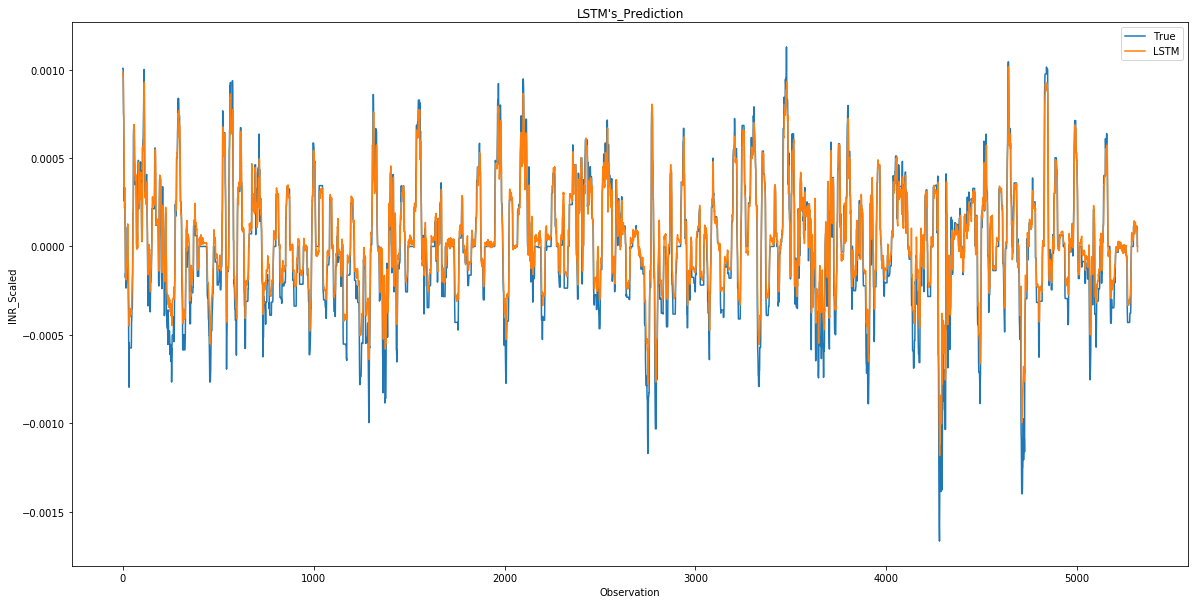

In [31]:
fig = plt.figure(figsize = (20,10))
plt.plot(y_test, label='True')
plt.plot(pridict_future_days, label='LSTM')
plt.title("LSTM's_Prediction")
plt.xlabel('Observation')
plt.ylabel('INR_Scaled')
plt.legend()
plt.show()